### Importing libraries

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import pandas as pd 
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mping
from keras.utils import load_img, img_to_array

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Exploring the dataset

In [ ]:
list1 = ['a','b','c', 'd','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s',
         't','u','v','w','x','y','z','0','1','2','3','4','5','6','7','8','9']
fig, axs = plt.subplots(6, 6)  
img_dict = {}
for alph in list1:
  print(alph)
  path = '/content/drive/MyDrive/sem-8/dl/DL Package/data/train' + '/' + alph
  items = os.listdir(path)
  for img in items:
    # print(img)
    new_path = path + '/' + img
    image = cv2.imread(new_path)
    img_dict[alph] = image
  cv2_imshow(image) # only one image for each alphabet

  # fig = plt.figure(figsize=(20, 5))
  # ax = fig.add_subplot(3, 12, iter, xticks=[], yticks=[])
  # ax[x, y].imshow(image)
  # ax.set_title("{}".format(alph)) 
  # plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
main_dir = "/content/drive/MyDrive/sem-8/dl/DL Package/data"

train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test1")

train_a_dir = os.path.join(train_dir, "a")
train_b_dir = os.path.join(train_dir, "b")
train_c_dir = os.path.join(train_dir, "c")
train_d_dir = os.path.join(train_dir, "d")
train_e_dir = os.path.join(train_dir, "e")
train_f_dir = os.path.join(train_dir, "f")
train_g_dir = os.path.join(train_dir, "g")
train_h_dir = os.path.join(train_dir, "h")
train_i_dir = os.path.join(train_dir, "i")
train_j_dir = os.path.join(train_dir, "j")
train_k_dir = os.path.join(train_dir, "k")
train_l_dir = os.path.join(train_dir, "l")
train_m_dir = os.path.join(train_dir, "m")
train_n_dir = os.path.join(train_dir, "n")
train_o_dir = os.path.join(train_dir, "o")
train_p_dir = os.path.join(train_dir, "p")
train_q_dir = os.path.join(train_dir, "q")
train_r_dir = os.path.join(train_dir, "r")
train_s_dir = os.path.join(train_dir, "s")
train_t_dir = os.path.join(train_dir, "t")
train_u_dir = os.path.join(train_dir, "u")
train_v_dir = os.path.join(train_dir, "v")
train_w_dir = os.path.join(train_dir, "w")
train_x_dir = os.path.join(train_dir, "x")
train_y_dir = os.path.join(train_dir, "y")
train_z_dir = os.path.join(train_dir, "z")
train_0_dir = os.path.join(train_dir, "0")
train_1_dir = os.path.join(train_dir, "1")
train_2_dir = os.path.join(train_dir, "2")
train_3_dir = os.path.join(train_dir, "3")
train_4_dir = os.path.join(train_dir, "4")
train_5_dir = os.path.join(train_dir, "5")
train_6_dir = os.path.join(train_dir, "6")
train_7_dir = os.path.join(train_dir, "7")
train_8_dir = os.path.join(train_dir, "8")
train_9_dir = os.path.join(train_dir, "9")


In [ ]:
test_a_dir = os.path.join(test_dir, "a")
test_b_dir = os.path.join(test_dir, "b")
test_c_dir = os.path.join(test_dir, "c")
test_d_dir = os.path.join(test_dir, "d")
test_e_dir = os.path.join(test_dir, "e")
test_f_dir = os.path.join(test_dir, "f")
test_g_dir = os.path.join(test_dir, "g")
test_h_dir = os.path.join(test_dir, "h")
test_i_dir = os.path.join(test_dir, "i")
test_j_dir = os.path.join(test_dir, "j")
test_k_dir = os.path.join(test_dir, "k")
test_l_dir = os.path.join(test_dir, "l")
test_m_dir = os.path.join(test_dir, "m")
test_n_dir = os.path.join(test_dir, "n")
test_o_dir = os.path.join(test_dir, "o")
test_p_dir = os.path.join(test_dir, "p")
test_q_dir = os.path.join(test_dir, "q")
test_r_dir = os.path.join(test_dir, "r")
test_s_dir = os.path.join(test_dir, "s")
test_t_dir = os.path.join(test_dir, "t")
test_u_dir = os.path.join(test_dir, "u")
test_v_dir = os.path.join(test_dir, "v")
test_w_dir = os.path.join(test_dir, "w")
test_x_dir = os.path.join(test_dir, "x")
test_y_dir = os.path.join(test_dir, "y")
test_z_dir = os.path.join(test_dir, "z")
test_0_dir = os.path.join(test_dir, "0")
test_1_dir = os.path.join(test_dir, "1")
test_2_dir = os.path.join(test_dir, "2")
test_3_dir = os.path.join(test_dir, "3")
test_4_dir = os.path.join(test_dir, "4")
test_5_dir = os.path.join(test_dir, "5")
test_6_dir = os.path.join(test_dir, "6")
test_7_dir = os.path.join(test_dir, "7")
test_8_dir = os.path.join(test_dir, "8")
test_9_dir = os.path.join(test_dir, "9")

In [ ]:
# print the filenames
train_a_names = os.listdir(train_a_dir)
train_b_names = os.listdir(train_b_dir)
train_c_names = os.listdir(train_c_dir)
train_d_names = os.listdir(train_d_dir)
train_e_names = os.listdir(train_e_dir)
train_f_names = os.listdir(train_f_dir)
train_g_names = os.listdir(train_g_dir)
train_h_names = os.listdir(train_h_dir)
train_i_names = os.listdir(train_i_dir)
train_j_names = os.listdir(train_j_dir)
train_k_names = os.listdir(train_k_dir)
train_l_names = os.listdir(train_l_dir)
train_m_names = os.listdir(train_m_dir)
train_n_names = os.listdir(train_n_dir)
train_o_names = os.listdir(train_o_dir)
train_p_names = os.listdir(train_p_dir)
train_q_names = os.listdir(train_q_dir)
train_r_names = os.listdir(train_r_dir)
train_s_names = os.listdir(train_s_dir)
train_t_names = os.listdir(train_t_dir)
train_u_names = os.listdir(train_u_dir)
train_v_names = os.listdir(train_v_dir)
train_w_names = os.listdir(train_w_dir)
train_x_names = os.listdir(train_x_dir)
train_y_names = os.listdir(train_y_dir)
train_z_names = os.listdir(train_z_dir)
train_0_names = os.listdir(train_0_dir)
train_1_names = os.listdir(train_1_dir)
train_2_names = os.listdir(train_2_dir)
train_3_names = os.listdir(train_3_dir)
train_4_names = os.listdir(train_4_dir)
train_5_names = os.listdir(train_5_dir)
train_6_names = os.listdir(train_6_dir)
train_7_names = os.listdir(train_7_dir)
train_8_names = os.listdir(train_8_dir)
train_9_names = os.listdir(train_9_dir)

test_a_names = os.listdir(test_a_dir)
test_b_names = os.listdir(test_b_dir)
test_c_names = os.listdir(test_c_dir)
test_d_names = os.listdir(test_d_dir)
test_e_names = os.listdir(test_e_dir)
test_f_names = os.listdir(test_f_dir)
test_g_names = os.listdir(test_g_dir)
test_h_names = os.listdir(test_h_dir)
test_i_names = os.listdir(test_i_dir)
test_j_names = os.listdir(test_j_dir)
test_k_names = os.listdir(test_k_dir)
test_l_names = os.listdir(test_l_dir)
test_m_names = os.listdir(test_m_dir)
test_n_names = os.listdir(test_n_dir)
test_o_names = os.listdir(test_o_dir)
test_p_names = os.listdir(test_p_dir)
test_q_names = os.listdir(test_q_dir)
test_r_names = os.listdir(test_r_dir)
test_s_names = os.listdir(test_s_dir)
test_t_names = os.listdir(test_t_dir)
test_u_names = os.listdir(test_u_dir)
test_v_names = os.listdir(test_v_dir)
test_w_names = os.listdir(test_w_dir)
test_x_names = os.listdir(test_x_dir)
test_y_names = os.listdir(test_y_dir)
test_z_names = os.listdir(test_z_dir)
test_0_names = os.listdir(test_0_dir)
test_1_names = os.listdir(test_1_dir)
test_2_names = os.listdir(test_2_dir)
test_3_names = os.listdir(test_3_dir)
test_4_names = os.listdir(test_4_dir)
test_5_names = os.listdir(test_5_dir)
test_6_names = os.listdir(test_6_dir)
test_7_names = os.listdir(test_7_dir)
test_8_names = os.listdir(test_8_dir)
test_9_names = os.listdir(test_9_dir)

In [ ]:
# print the total number of images present in each directory
print("Total images present in the training set: ", len(train_a_names + train_b_names + train_c_names + train_d_names + train_e_names + train_f_names + train_g_names + train_h_names + train_i_names + train_j_names + train_k_names + train_l_names +train_m_names + train_n_names + train_o_names + train_p_names + train_q_names + train_r_names +train_s_names + train_t_names + train_u_names + train_v_names + train_w_names + train_x_names +train_y_names + train_z_names + train_0_names + train_1_names + train_2_names + train_3_names +train_4_names + train_5_names + train_6_names + train_7_names + train_8_names + train_9_names ))
print("Total images present in the testing set: ", len(test_a_names +test_b_names +test_c_names +test_d_names +test_e_names +test_f_names +test_g_names +test_h_names +test_i_names +test_j_names +test_k_names +test_l_names +test_m_names +test_n_names +test_o_names +test_p_names +test_q_names +test_r_names +test_s_names +test_t_names +test_u_names +test_v_names +test_w_names +test_x_names +test_y_names +test_z_names +test_0_names +test_1_names +test_2_names +test_3_names +test_4_names +test_5_names +test_6_names +test_7_names +test_8_names +test_9_names))

Total images present in the training set:  1651
Total images present in the testing set:  360


## Data Visualization

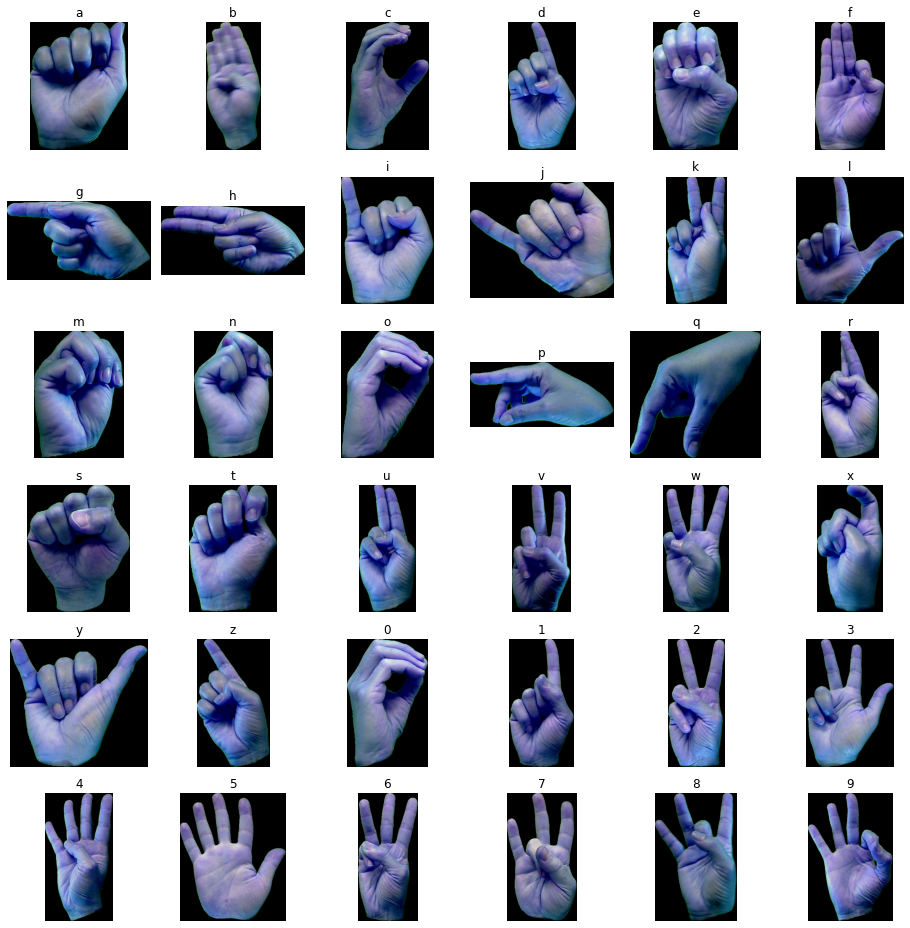

In [ ]:
f, ax = plt.subplots(6, 6) 
plt.axis('off')  
f.set_size_inches(13, 13)
k = 0
for i in range(6):
    for j in range(6):
        ax[i,j].imshow(img_dict[list1[k]])
        ax[i, j].set_title("{}".format(list1[k]))
        ax[i, j].axis('off')
        k += 1
    plt.tight_layout()  

## Data Preprocessing and Augmentation

In [ ]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255)

dgen_test = ImageDataGenerator(rescale = 1./255)

In [ ]:

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = "training",
                                                 batch_size = 32,
                                                 class_mode = "categorical") 
dgen_validation = ImageDataGenerator(rescale = 1./255)
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = "validation",
                                                 batch_size = 32,
                                                 class_mode = "categorical")

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = "categorical") 

Found 1328 images belonging to 36 classes.
Found 323 images belonging to 36 classes.
Found 360 images belonging to 36 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

## Building Convolution neural network model

In [ ]:
model = Sequential()
# add the convolutional layer
model.add(Conv2D(32, (5,5), padding = "SAME", activation = "relu", input_shape = (150, 150, 3))) #(, size of filter, padding, actiavtion fn) and get the features
# pooling layer to reduce dimensionality with retaining all the image info
model.add(MaxPooling2D(pool_size = (2, 2)))
# place a dropout layer
model.add(Dropout(0.5)) # 50 percent of features are dropped


# add another convolutional layer
model.add(Conv2D(64, (5,5), padding = "SAME", activation = "relu"))
# pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))
# place a dropout layer
model.add(Dropout(0.5))


# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = "relu"))
# place a dropout layer
model.add(Dropout(0.5))

model.add(Dense(36, activation = "softmax")) # 36 classes
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 37, 37, 64)       

## Compile and Train the model

In [ ]:
#compile the model
model.compile(Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
#train the model
history = model.fit(train_generator, epochs = 30, validation_data = validation_generator)

Epoch 1/30
42/42 [==============================] - 97s 2s/step - loss: 1.2695 - accuracy: 0.6137 - val_loss: 0.9483 - val_accuracy: 0.7245
Epoch 2/30
42/42 [==============================] - 95s 2s/step - loss: 1.0032 - accuracy: 0.6928 - val_loss: 0.8078 - val_accuracy: 0.7307
Epoch 3/30
42/42 [==============================] - 95s 2s/step - loss: 0.9639 - accuracy: 0.6958 - val_loss: 0.6995 - val_accuracy: 0.7895
Epoch 4/30
42/42 [==============================] - 95s 2s/step - loss: 0.7655 - accuracy: 0.7605 - val_loss: 0.5718 - val_accuracy: 0.8359
Epoch 5/30
42/42 [==============================] - 97s 2s/step - loss: 0.7081 - accuracy: 0.7696 - val_loss: 0.5415 - val_accuracy: 0.8297
Epoch 6/30
42/42 [==============================] - 97s 2s/step - loss: 0.7000 - accuracy: 0.7726 - val_loss: 0.5042 - val_accuracy: 0.8328
Epoch 7/30
42/42 [==============================] - 96s 2s/step - loss: 0.6184 - accuracy: 0.7997 - val_loss: 0.5532 - val_accuracy: 0.8080
Epoch 8/30
42/42 [==

## Performance evaluation

In [ ]:
# get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

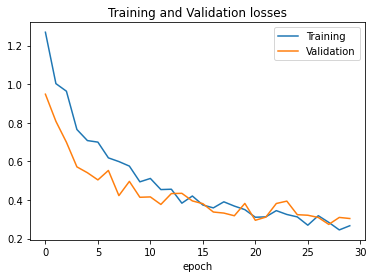

In [ ]:
# plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Training", "Validation"])
plt.title("Training and Validation losses")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

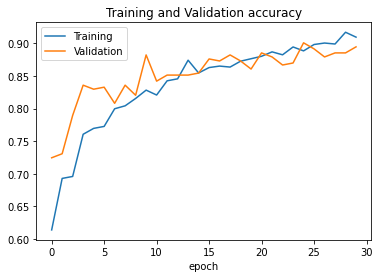

In [ ]:
# plot graph betwwen training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Training", "Validation"])
plt.title("Training and Validation accuracy")
plt.xlabel("epoch")

In [ ]:
# get the test accuracy and loss
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss: :", test_loss)
print("Test accuracy: ", test_accuracy)

12/12 [==============================] - 6s 516ms/step - loss: 0.2113 - accuracy: 0.9194
Test Loss: : 0.21131841838359833
Test accuracy:  0.9194444417953491


## Prediction on new data

In [ ]:
model = load_model("/content/drive/MyDrive/sem-8/dl/DL Package/CNN_HSL.h5")

In [ ]:
# /content/drive/MyDrive/sem-8/dl/DL Package/test_image.png
# from keras.preprocessing import image
for i in range(36):
    img_path = input("Enter the url path for an image...")
    img = load_img(img_path, target_size = (150, 150))
    images = img_to_array(img)
    images = np.expand_dims(images, axis = 0)
    predictions = model.predict(images)
    print("================================")
    if predictions[0][0] == 1:
        print("Number 0")
    elif predictions[0][1] == 1:
        print("Number 1")
    elif predictions[0][2] == 1:
        print("Number 2")
    elif predictions[0][3] == 1:
        print("Number 3")
    elif predictions[0][4] == 1:
        print("Number 4")
    elif predictions[0][5] == 1:
        print("Number 5")
    elif predictions[0][6] == 1:
        print("Number 6")
    elif predictions[0][7] == 1:
        print("Number 7")
    elif predictions[0][8] == 1:
        print("Number 8")
    elif predictions[0][9] == 1:
        print("Number 9")
    elif predictions[0][10] == 1:
        print("Alphabet A")
    elif predictions[0][11] == 1:
        print("Alphabet B")
    elif predictions[0][12] == 1:
        print("Alphabet C")
    elif predictions[0][13] == 1:
        print("Alphabet D")
    elif predictions[0][14] == 1:
        print("Alphabet E")
    elif predictions[0][15] == 1:
        print("Alphabet F")
    elif predictions[0][16] == 1:
        print("Alphabet G")
    elif predictions[0][17] == 1:
        print("Alphabet H")
    elif predictions[0][18] == 1:
        print("Alphabet I")
    elif predictions[0][19] == 1:
        print("Alphabet J")
    elif predictions[0][20] == 1:
        print("Alphabet K")
    elif predictions[0][21] == 1:
        print("Alphabet L")
    elif predictions[0][22] == 1:
        print("Alphabet M")
    elif predictions[0][23] == 1:
        print("Alphabet N")
    elif predictions[0][24] == 1:
        print("Alphabet O")
    elif predictions[0][25] == 1:
        print("Alphabet P")
    elif predictions[0][26] == 1:
        print("Alphabet Q")
    elif predictions[0][27] == 1:
        print("Alphabet R")
    elif predictions[0][28] == 1:
        print("Alphabet S")
    elif predictions[0][29] == 1:
        print("Alphabet T")
    elif predictions[0][30] == 1:
        print("Alphabet U")
    elif predictions[0][31] == 1:
        print("Alphabet V")
    elif predictions[0][32] == 1:
        print("Alphabet W")
    elif predictions[0][33] == 1:
        print("Alphabet X")
    elif predictions[0][34] == 1:
        print("Alphabet Y")
    elif predictions[0][35] == 1:
        print("Alphabet Z")

In [ ]:
def prediction_(img_path):
    # img_path = input("Enter the url path for an image...")
    img = load_img(img_path, target_size = (150, 150))
    images = img_to_array(img)
    images = np.expand_dims(images, axis = 0)
    predictions = model.predict(images)
    print("================================")
    if predictions[0][0] == 1:
        # print("Number 0")
        return '0'
    elif predictions[0][1] == 1:
        # print("Number 1")
        return '1'
    elif predictions[0][2] == 1:
        # print("Number 2")
        return '2'
    elif predictions[0][3] == 1:
        # print("Number 3")
        return '3'
    elif predictions[0][4] == 1:
        # print("Number 4")
        return '4'
    elif predictions[0][5] == 1:
        # print("Number 5")
        return '5'
    elif predictions[0][6] == 1:
        # print("Number 6")
        return '6'
    elif predictions[0][7] == 1:
        # print("Number 7")
        return '7'
    elif predictions[0][8] == 1:
        # print("Number 8")
        return '8'
    elif predictions[0][9] == 1:
        # print("Number 9")
        return '9'
    elif predictions[0][10] == 1:
        # print("Alphabet A")
        return 'A'
    elif predictions[0][11] == 1:
        # print("Alphabet B")
        return 'B'
    elif predictions[0][12] == 1:
        # print("Alphabet C")
        return 'C'
    elif predictions[0][13] == 1:
        # print("Alphabet D")
        return 'D'
    elif predictions[0][14] == 1:
        # print("Alphabet E")
        return 'E'
    elif predictions[0][15] == 1:
        # print("Alphabet F")
        return 'F'
    elif predictions[0][16] == 1:
        # print("Alphabet G")
        return 'G'
    elif predictions[0][17] == 1:
        # print("Alphabet H")
        return 'H'
    elif predictions[0][18] == 1:
        # print("Alphabet I")
        return 'I'
    elif predictions[0][19] == 1:
        # print("Alphabet J")
        return 'J'
    elif predictions[0][20] == 1:
        # print("Alphabet K")
        return 'K'
    elif predictions[0][21] == 1:
        # print("Alphabet L")
        return 'L'
    elif predictions[0][22] == 1:
        # print("Alphabet M")
        return 'M'
    elif predictions[0][23] == 1:
        # print("Alphabet N")
        return 'N'
    elif predictions[0][24] == 1:
        # print("Alphabet O")
        return 'O'
    elif predictions[0][25] == 1:
        # print("Alphabet P")
        return 'P'
    elif predictions[0][26] == 1:
        # print("Alphabet Q")
        return 'Q'
    elif predictions[0][27] == 1:
        # print("Alphabet R")
        return 'R'
    elif predictions[0][28] == 1:
        # print("Alphabet S")
        return 'S'
    elif predictions[0][29] == 1:
        # print("Alphabet T")
        return 'T'
    elif predictions[0][30] == 1:
        # print("Alphabet U")
        return 'U'
    elif predictions[0][31] == 1:
        # print("Alphabet V")
        return 'V'
    elif predictions[0][32] == 1:
        # print("Alphabet W")
        return 'W'
    elif predictions[0][33] == 1:
        # print("Alphabet X")
        return 'X'
    elif predictions[0][34] == 1:
        # print("Alphabet Y")
        return 'Y'
    elif predictions[0][35] == 1:
        # print("Alphabet Z")
        return 'Z'
    else:
      return ''

In [ ]:
list1 = ['a','b','c', 'd','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s',
         't','u','v','w','x','y','z','0','1','2','3','4','5','6','7','8','9']
for alph in list1:
  # print(alph)
  path = '/content/drive/MyDrive/DL Package/data/test3' + '/' + alph
  items = os.listdir(path)
  for i in items:
    res = []
    res_str = ''
    img_path = path + '/' + i
    output = prediction_(img_path)
    res.append(output)
    res_str += output
    print("Predicted output for "+alph+ ": ",output)
    break

1/1 [==============================] - 0s 102ms/step
Predicted output for a:  A
1/1 [==============================] - 0s 92ms/step
Predicted output for b:  B
1/1 [==============================] - 0s 94ms/step
Predicted output for c:  C
1/1 [==============================] - 0s 94ms/step
Predicted output for d:  D
1/1 [==============================] - 0s 89ms/step
Predicted output for e:  E
1/1 [==============================] - 0s 98ms/step
Predicted output for f:  F
1/1 [==============================] - 0s 83ms/step
Predicted output for g:  G
1/1 [==============================] - 0s 86ms/step
Predicted output for h:  H
1/1 [==============================] - 0s 85ms/step
Predicted output for i:  I
1/1 [==============================] - 0s 91ms/step
Predicted output for j:  J
1/1 [==============================] - 0s 100ms/step
Predicted output for k:  K
1/1 [==============================] - 0s 87ms/step
Predicted output for l:  L
1/1 [==============================] - 0s 88ms/ste

In [ ]:
import cv2
import os
import time
import uuid

from cv2 import VideoCapture
from cv2 import waitKey

In [ ]:
IMAGES_PATH = '/content'
labels = ['A','B','0','1']
number_imgs = 1

In [ ]:
for label in labels:
    !mkdir {'\content\collectedimages\\' + label}
    cap = cv2.VideoCapture(0)
    print("Collecting Images for {}".format(label))
    time.sleep(5)
    for imgnum in range(number_imgs):
        ret, frame = cap.read()
        imagename = os.path.join(IMAGES_PATH, label, label + '.' + '{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imagename, frame)
        cv2.imshow('frame', frame)
        time.sleep(2)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()

In [ ]:
model = load_model("/content/drive/MyDrive/sem-8/dl/DL Package/CNN_HSL.h5")

In [ ]:
def prediction(img_path):
    # img_path = input("Enter the url path for an image...")
    img = load_img(img_path, target_size = (150, 150))
    images = img_to_array(img)
    images = np.expand_dims(images, axis = 0)
    predictions = model.predict(images)
    print("================================")
    if predictions[0][0] == 1:
        print("Number 0")
        return '0'
    elif predictions[0][1] == 1:
        print("Number 1")
        return '1'
    elif predictions[0][2] == 1:
        print("Number 2")
        return '2'
    elif predictions[0][3] == 1:
        print("Number 3")
        return '3'
    elif predictions[0][4] == 1:
        print("Number 4")
        return '4'
    elif predictions[0][5] == 1:
        print("Number 5")
        return '5'
    elif predictions[0][6] == 1:
        print("Number 6")
        return '6'
    elif predictions[0][7] == 1:
        print("Number 7")
        return '7'
    elif predictions[0][8] == 1:
        print("Number 8")
        return '8'
    elif predictions[0][9] == 1:
        print("Number 9")
        return '9'
    elif predictions[0][10] == 1:
        print("Alphabet A")
        return 'A'
    elif predictions[0][11] == 1:
        print("Alphabet B")
        return 'B'
    elif predictions[0][12] == 1:
        print("Alphabet C")
        return 'C'
    elif predictions[0][13] == 1:
        print("Alphabet D")
        return 'D'
    elif predictions[0][14] == 1:
        print("Alphabet E")
        return 'E'
    elif predictions[0][15] == 1:
        print("Alphabet F")
        return 'F'
    elif predictions[0][16] == 1:
        print("Alphabet G")
        return 'G'
    elif predictions[0][17] == 1:
        print("Alphabet H")
        return 'H'
    elif predictions[0][18] == 1:
        print("Alphabet I")
        return 'I'
    elif predictions[0][19] == 1:
        print("Alphabet J")
        return 'J'
    elif predictions[0][20] == 1:
        print("Alphabet K")
        return 'K'
    elif predictions[0][21] == 1:
        print("Alphabet L")
        return 'L'
    elif predictions[0][22] == 1:
        print("Alphabet M")
        return 'M'
    elif predictions[0][23] == 1:
        print("Alphabet N")
        return 'N'
    elif predictions[0][24] == 1:
        print("Alphabet O")
        return 'O'
    elif predictions[0][25] == 1:
        print("Alphabet P")
        return 'P'
    elif predictions[0][26] == 1:
        print("Alphabet Q")
        return 'Q'
    elif predictions[0][27] == 1:
        print("Alphabet R")
        return 'R'
    elif predictions[0][28] == 1:
        print("Alphabet S")
        return 'S'
    elif predictions[0][29] == 1:
        print("Alphabet T")
        return 'T'
    elif predictions[0][30] == 1:
        print("Alphabet U")
        return 'U'
    elif predictions[0][31] == 1:
        print("Alphabet V")
        return 'V'
    elif predictions[0][32] == 1:
        print("Alphabet W")
        return 'W'
    elif predictions[0][33] == 1:
        print("Alphabet X")
        return 'X'
    elif predictions[0][34] == 1:
        print("Alphabet Y")
        return 'Y'
    elif predictions[0][35] == 1:
        print("Alphabet Z")
        return 'Z'
    else:
      return ''

## Phase - 2: Testing with real time images

In [ ]:
def prediction_2(img_path):
    # img_path = input("Enter the url path for an image...")
    img = load_img(img_path, target_size = (150, 150))
    images = img_to_array(img)
    images = np.expand_dims(images, axis = 0)
    predictions = model2.predict(images)
    print("================================")
    if predictions[0][0] == 1:
        # print("Number 0")
        return '0'
    elif predictions[0][1] == 1:
        # print("Number 1")
        return '1'
    elif predictions[0][2] == 1:
        # print("Number 2")
        return '2'
    elif predictions[0][3] == 1:
        # print("Number 3")
        return '3'
    elif predictions[0][4] == 1:
        # print("Number 4")
        return '4'
    elif predictions[0][5] == 1:
        # print("Number 5")
        return '5'
    elif predictions[0][6] == 1:
        # print("Number 6")
        return '6'
    elif predictions[0][7] == 1:
        # print("Number 7")
        return '7'
    elif predictions[0][8] == 1:
        # print("Number 8")
        return '8'
    elif predictions[0][9] == 1:
        # print("Number 9")
        return '9'
    elif predictions[0][10] == 1:
        # print("Alphabet A")
        return 'A'
    elif predictions[0][11] == 1:
        # print("Alphabet B")
        return 'B'
    elif predictions[0][12] == 1:
        # print("Alphabet C")
        return 'C'
    elif predictions[0][13] == 1:
        # print("Alphabet D")
        return 'D'
    elif predictions[0][14] == 1:
        # print("Alphabet E")
        return 'E'
    elif predictions[0][15] == 1:
        # print("Alphabet F")
        return 'F'
    elif predictions[0][16] == 1:
        # print("Alphabet G")
        return 'G'
    elif predictions[0][17] == 1:
        # print("Alphabet H")
        return 'H'
    elif predictions[0][18] == 1:
        # print("Alphabet I")
        return 'I'
    elif predictions[0][19] == 1:
        # print("Alphabet J")
        return 'J'
    elif predictions[0][20] == 1:
        # print("Alphabet K")
        return 'K'
    elif predictions[0][21] == 1:
        # print("Alphabet L")
        return 'L'
    elif predictions[0][22] == 1:
        # print("Alphabet M")
        return 'M'
    elif predictions[0][23] == 1:
        # print("Alphabet N")
        return 'N'
    elif predictions[0][24] == 1:
        # print("Alphabet O")
        return 'O'
    elif predictions[0][25] == 1:
        # print("Alphabet P")
        return 'P'
    elif predictions[0][26] == 1:
        # print("Alphabet Q")
        return 'Q'
    elif predictions[0][27] == 1:
        # print("Alphabet R")
        return 'R'
    elif predictions[0][28] == 1:
        # print("Alphabet S")
        return 'S'
    elif predictions[0][29] == 1:
        # print("Alphabet T")
        return 'T'
    elif predictions[0][30] == 1:
        # print("Alphabet U")
        return 'U'
    elif predictions[0][31] == 1:
        # print("Alphabet V")
        return 'V'
    elif predictions[0][32] == 1:
        # print("Alphabet W")
        return 'W'
    elif predictions[0][33] == 1:
        # print("Alphabet X")
        return 'X'
    elif predictions[0][34] == 1:
        # print("Alphabet Y")
        return 'Y'
    elif predictions[0][35] == 1:
        # print("Alphabet Z")
        return 'Z'
    else:
      return ''

In [ ]:
list1 = ['a','b','c', 'd','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s',
         't','u','v','w','x','y','z','0','1','2','3','4','5','6','7','8','9']
for alph in list1:
  # print(alph)
  path = '/content/drive/MyDrive/DL Package/data/test3' + '/' + alph
  items = os.listdir(path)
  for i in items:
    res = []
    res_str = ''
    img_path = path + '/' + i
    output = prediction_2(img_path)
    res.append(output)
    res_str += output
    print("Predicted output for "+alph+ ": ",output)
    break

1/1 [==============================] - 0s 127ms/step
Predicted output for a:  
1/1 [==============================] - 0s 64ms/step
Predicted output for b:  B
1/1 [==============================] - 0s 73ms/step
Predicted output for c:  C
1/1 [==============================] - 0s 75ms/step
Predicted output for d:  D
1/1 [==============================] - 0s 78ms/step
Predicted output for e:  E
1/1 [==============================] - 0s 71ms/step
Predicted output for f:  F
1/1 [==============================] - 0s 77ms/step
Predicted output for g:  G
1/1 [==============================] - 0s 64ms/step
Predicted output for h:  H
1/1 [==============================] - 0s 66ms/step
Predicted output for i:  I
1/1 [==============================] - 0s 71ms/step
Predicted output for j:  Y
1/1 [==============================] - 0s 69ms/step
Predicted output for k:  K
1/1 [==============================] - 0s 72ms/step
Predicted output for l:  L
1/1 [==============================] - 0s 74ms/step


In [ ]:
n_img = int(input("Enter the number of images: "))

Enter the number of images: 4


In [ ]:
res = []
res_str = ''
for i in range(n_img):
  img_path = str(input("Enter the image path: "))
  output = prediction(img_path)
  res.append(output)
  res_str += output
  print("output for "+img_path+ ": ",output)

Enter the image path: /content/A.585efc70-c8a5-11ed-a8fa-2acdc4bb5aad.jpg
1/1 [==============================] - 0s 66ms/step
output for /content/A.585efc70-c8a5-11ed-a8fa-2acdc4bb5aad.jpg:  
Enter the image path: /content/B.5d0dbd13-c8a5-11ed-8e03-2acdc4bb5aad.jpg
1/1 [==============================] - 0s 55ms/step
Alphabet B
output for /content/B.5d0dbd13-c8a5-11ed-8e03-2acdc4bb5aad.jpg:  B
Enter the image path: /content/0.61c80fda-c8a5-11ed-8163-2acdc4bb5aad.jpg
1/1 [==============================] - 0s 55ms/step
Alphabet B
output for /content/0.61c80fda-c8a5-11ed-8163-2acdc4bb5aad.jpg:  B
Enter the image path: /content/1.667b104f-c8a5-11ed-ba08-2acdc4bb5aad.jpg
1/1 [==============================] - 0s 61ms/step
Alphabet B
output for /content/1.667b104f-c8a5-11ed-ba08-2acdc4bb5aad.jpg:  B


In [ ]:
model2 = Sequential()
# add the convolutional layer
model2.add(Conv2D(75, (5,5), padding = "SAME", activation = "relu", input_shape = (150, 150, 3))) #(, size of filter, padding, actiavtion fn) and get the features
# pooling layer to reduce dimensionality with retaining all the image info
model2.add(MaxPooling2D(pool_size = (2, 2)))

# add another convolutional layer
model2.add(Conv2D(50, (5,5), padding = "SAME", activation = "relu"))
# pooling layer
model2.add(MaxPooling2D(pool_size = (2, 2)))

# add another convolutional layer
model2.add(Conv2D(25, (5,5), padding = "SAME", activation = "relu"))
# pooling layer
model2.add(MaxPooling2D(pool_size = (2, 2)))


# Flatten layer
model2.add(Flatten())
# add a dense layer : amount of nodes, activation
model2.add(Dense(512, activation = "relu"))
# place a dropout layer
model2.add(Dropout(0.2))

model2.add(Dense(36, activation = "softmax")) # 36 classes
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 75)      5700      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 50)        93800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 25)        31275     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 25)       0

In [ ]:
#compile the model
model2.compile(Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
#train the model
history2 = model2.fit(train_generator, epochs = 20, validation_data = validation_generator)

Epoch 1/20
42/42 [==============================] - 450s 11s/step - loss: 3.0511 - accuracy: 0.1920 - val_loss: 1.8367 - val_accuracy: 0.4551
Epoch 2/20
42/42 [==============================] - 274s 6s/step - loss: 1.3252 - accuracy: 0.5971 - val_loss: 1.0301 - val_accuracy: 0.6966
Epoch 3/20
42/42 [==============================] - 274s 7s/step - loss: 0.8636 - accuracy: 0.7282 - val_loss: 0.7338 - val_accuracy: 0.7957
Epoch 4/20
42/42 [==============================] - 274s 7s/step - loss: 0.6314 - accuracy: 0.7967 - val_loss: 0.6421 - val_accuracy: 0.7616
Epoch 5/20
42/42 [==============================] - 292s 7s/step - loss: 0.5270 - accuracy: 0.8336 - val_loss: 0.5795 - val_accuracy: 0.8142
Epoch 6/20
42/42 [==============================] - 277s 7s/step - loss: 0.4071 - accuracy: 0.8599 - val_loss: 0.5464 - val_accuracy: 0.8173
Epoch 7/20
42/42 [==============================] - 273s 7s/step - loss: 0.3238 - accuracy: 0.8901 - val_loss: 0.5083 - val_accuracy: 0.8235
Epoch 8/20
4

In [ ]:
# model2.save('/content/drive/MyDrive/sem-8/dl/DL Package/CNN_model2.h5')
model2.save('CNN_model2.h5')

## Performance evaluation on model2

In [ ]:
# get the keys of history object
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

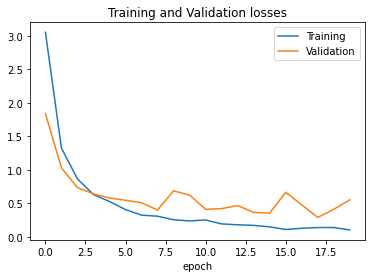

In [ ]:
# plot graph between training and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(["Training", "Validation"])
plt.title("Training and Validation losses")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

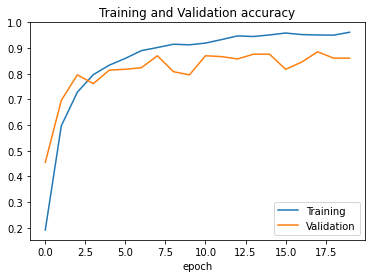

In [ ]:
# plot graph betwwen training and validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(["Training", "Validation"])
plt.title("Training and Validation accuracy")
plt.xlabel("epoch")

In [ ]:
# get the test accuracy and loss
test_loss, test_accuracy = model2.evaluate(test_generator)
print("Test Loss: :", test_loss)
print("Test accuracy: ", test_accuracy)

12/12 [==============================] - 68s 6s/step - loss: 0.1998 - accuracy: 0.9278
Test Loss: : 0.19980907440185547
Test accuracy:  0.9277777671813965


In [ ]:
def prediction2(img_path):
    # img_path = input("Enter the url path for an image...")
    img = load_img(img_path, target_size = (150, 150))
    images = img_to_array(img)
    images = np.expand_dims(images, axis = 0)
    predictions = model2.predict(images)
    print("================================")
    if predictions[0][0] == 1:
        print("Number 0")
        return '0'
    elif predictions[0][1] == 1:
        print("Number 1")
        return '1'
    elif predictions[0][2] == 1:
        print("Number 2")
        return '2'
    elif predictions[0][3] == 1:
        print("Number 3")
        return '3'
    elif predictions[0][4] == 1:
        print("Number 4")
        return '4'
    elif predictions[0][5] == 1:
        print("Number 5")
        return '5'
    elif predictions[0][6] == 1:
        print("Number 6")
        return '6'
    elif predictions[0][7] == 1:
        print("Number 7")
        return '7'
    elif predictions[0][8] == 1:
        print("Number 8")
        return '8'
    elif predictions[0][9] == 1:
        print("Number 9")
        return '9'
    elif predictions[0][10] == 1:
        print("Alphabet A")
        return 'A'
    elif predictions[0][11] == 1:
        print("Alphabet B")
        return 'B'
    elif predictions[0][12] == 1:
        print("Alphabet C")
        return 'C'
    elif predictions[0][13] == 1:
        print("Alphabet D")
        return 'D'
    elif predictions[0][14] == 1:
        print("Alphabet E")
        return 'E'
    elif predictions[0][15] == 1:
        print("Alphabet F")
        return 'F'
    elif predictions[0][16] == 1:
        print("Alphabet G")
        return 'G'
    elif predictions[0][17] == 1:
        print("Alphabet H")
        return 'H'
    elif predictions[0][18] == 1:
        print("Alphabet I")
        return 'I'
    elif predictions[0][19] == 1:
        print("Alphabet J")
        return 'J'
    elif predictions[0][20] == 1:
        print("Alphabet K")
        return 'K'
    elif predictions[0][21] == 1:
        print("Alphabet L")
        return 'L'
    elif predictions[0][22] == 1:
        print("Alphabet M")
        return 'M'
    elif predictions[0][23] == 1:
        print("Alphabet N")
        return 'N'
    elif predictions[0][24] == 1:
        print("Alphabet O")
        return 'O'
    elif predictions[0][25] == 1:
        print("Alphabet P")
        return 'P'
    elif predictions[0][26] == 1:
        print("Alphabet Q")
        return 'Q'
    elif predictions[0][27] == 1:
        print("Alphabet R")
        return 'R'
    elif predictions[0][28] == 1:
        print("Alphabet S")
        return 'S'
    elif predictions[0][29] == 1:
        print("Alphabet T")
        return 'T'
    elif predictions[0][30] == 1:
        print("Alphabet U")
        return 'U'
    elif predictions[0][31] == 1:
        print("Alphabet V")
        return 'V'
    elif predictions[0][32] == 1:
        print("Alphabet W")
        return 'W'
    elif predictions[0][33] == 1:
        print("Alphabet X")
        return 'X'
    elif predictions[0][34] == 1:
        print("Alphabet Y")
        return 'Y'
    elif predictions[0][35] == 1:
        print("Alphabet Z")
        return 'Z'
    else:
      return ''

In [ ]:
n_img = int(input("Enter the number of images: "))

Enter the number of images: 5


In [ ]:
res = []
res_str = ''
for i in range(n_img):
  img_path = str(input("Enter the image path: "))
  output = prediction(img_path)
  res.append(output)
  res_str += output
  print("output for "+img_path+ ": ",output)

Enter the image path: /content/H.6e85ecb6-c8c9-11ed-8e16-2acdc4bb5aad.jpg
1/1 [==============================] - 0s 72ms/step
Alphabet B
output for /content/H.6e85ecb6-c8c9-11ed-8e16-2acdc4bb5aad.jpg:  B
Enter the image path: /content/E.734ad2c1-c8c9-11ed-80ac-2acdc4bb5aad.jpg
1/1 [==============================] - 0s 50ms/step
Alphabet B
output for /content/E.734ad2c1-c8c9-11ed-80ac-2acdc4bb5aad.jpg:  B
Enter the image path: /content/L.780b1b0b-c8c9-11ed-b82f-2acdc4bb5aad.jpg
1/1 [==============================] - 0s 54ms/step
Alphabet B
output for /content/L.780b1b0b-c8c9-11ed-b82f-2acdc4bb5aad.jpg:  B
Enter the image path: /content/O.9ba1f682-c8c9-11ed-81a9-2acdc4bb5aad.jpg
1/1 [==============================] - 0s 51ms/step
Alphabet M
output for /content/O.9ba1f682-c8c9-11ed-81a9-2acdc4bb5aad.jpg:  M
Enter the image path: /content/3.8196a6f0-c8c9-11ed-accf-2acdc4bb5aad.jpg
1/1 [==============================] - 0s 86ms/step
Alphabet B
output for /content/3.8196a6f0-c8c9-11ed-accf-2

In [ ]:
res = []
n_img = 1
res_str = ''
for i in range(n_img):
  img_path = str(input("Enter the image path: "))
  output = prediction(img_path)
  res.append(output)
  res_str += output
  print("output for "+img_path+ ": ",output)

Enter the image path: /content/5.86580797-c8c9-11ed-9eb5-2acdc4bb5aad.jpg
1/1 [==============================] - 0s 52ms/step
Alphabet B
output for /content/5.86580797-c8c9-11ed-9eb5-2acdc4bb5aad.jpg:  B


## **Real-time HSL capturing**

##Phase - 3: Training with collected images 

In [ ]:
main_dir = "/content/drive/MyDrive/sem-8/dl/DL Package/data/collectedimages"

train_dir = main_dir

train_a_dir = os.path.join(main_dir, "A")
train_b_dir = os.path.join(main_dir, "B")
train_c_dir = os.path.join(main_dir, "C")
train_d_dir = os.path.join(main_dir, "D")


# train_q_dir = os.path.join(train_dir, "q")
# train_r_dir = os.path.join(train_dir, "r")
# train_s_dir = os.path.join(train_dir, "s")
# train_t_dir = os.path.join(train_dir, "t")
# train_u_dir = os.path.join(train_dir, "u")
# train_v_dir = os.path.join(train_dir, "v")
# train_w_dir = os.path.join(train_dir, "w")
# train_x_dir = os.path.join(train_dir, "x")
# train_y_dir = os.path.join(train_dir, "y")
# train_z_dir = os.path.join(train_dir, "z")
# train_0_dir = os.path.join(train_dir, "0")
# train_1_dir = os.path.join(train_dir, "1")
# train_2_dir = os.path.join(train_dir, "2")
# train_3_dir = os.path.join(train_dir, "3")
# train_4_dir = os.path.join(train_dir, "4")
# train_5_dir = os.path.join(train_dir, "5")
# train_6_dir = os.path.join(train_dir, "6")
# train_7_dir = os.path.join(train_dir, "7")
# train_8_dir = os.path.join(train_dir, "8")
# train_9_dir = os.path.join(train_dir, "9")


In [ ]:
train_a_names = os.listdir(train_a_dir)
train_b_names = os.listdir(train_b_dir)
train_c_names = os.listdir(train_c_dir)
train_d_names = os.listdir(train_d_dir)

In [ ]:
print("Total images present in the training set: ", len(train_a_names + train_b_names + train_c_names + train_d_names))

Total images present in the training set:  19


In [ ]:
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.1,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = "validation",
                                                 batch_size = 32,
                                                 class_mode = "categorical")


In [ ]:
train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = "training",
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 16 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3}

In [ ]:
model3 = Sequential()
# add the convolutional layer
model3.add(Conv2D(75, (5,5), padding = "SAME", activation = "relu", input_shape = (150, 150, 3))) #(, size of filter, padding, actiavtion fn) and get the features
# pooling layer to reduce dimensionality with retaining all the image info
model3.add(MaxPooling2D(pool_size = (2, 2)))

# add another convolutional layer
model3.add(Conv2D(50, (5,5), padding = "SAME", activation = "relu"))
# pooling layer
model3.add(MaxPooling2D(pool_size = (2, 2)))

# add another convolutional layer
model3.add(Conv2D(25, (5,5), padding = "SAME", activation = "relu"))
# pooling layer
model3.add(MaxPooling2D(pool_size = (2, 2)))


# Flatten layer
model3.add(Flatten())
# add a dense layer : amount of nodes, activation
model3.add(Dense(512, activation = "relu"))
# place a dropout layer
model3.add(Dropout(0.2))

model3.add(Dense(4, activation = "softmax")) # 36 classes
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 75)      5700      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 50)        93800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 50)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 25)        31275     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 25)      

In [ ]:
#compile the model
model3.compile(Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
#train the model
history3 = model3.fit(train_generator, epochs = 20, validation_data = validation_generator)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 1.3848 - accuracy: 0.2500
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 1.4932 - accuracy: 0.3125
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 1.4697 - accuracy: 0.2500
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 1.3812 - accuracy: 0.2500
Epoch 5/20
1/1 [==============================] - 4s 4s/step - loss: 1.3735 - accuracy: 0.3125
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 1.3896 - accuracy: 0.1875
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 1.3602 - accuracy: 0.3750
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 1.2717 - accuracy: 0.7500
Epoch 9/20
1/1 [==============================] - 3s 3s/step - loss: 1.2406 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 4s 4s/step - loss: 1.3276 - accuracy: 0.3125
Epoch 11/20
1/1 [==============================] 

In [ ]:
def prediction3(img_path):
    # img_path = input("Enter the url path for an image...")
    img = load_img(img_path, target_size = (150, 150))
    images = img_to_array(img)
    images = np.expand_dims(images, axis = 0)
    predictions = model3.predict(images)
    print("================================")
    if predictions[0][0] == 1:
        print("A")
        return 'A'
    elif predictions[0][1] == 1:
        print("B")
        return 'B'
    elif predictions[0][2] == 1:
        print("C")
        return 'C'
    elif predictions[0][3] == 1:
        print("D")
        return 'D'
    elif predictions[0][4] == 1:
        print("Number 4")
        return '4'
    elif predictions[0][5] == 1:
        print("Number 5")
        return '5'
    elif predictions[0][6] == 1:
        print("Number 6")
        return '6'
    elif predictions[0][7] == 1:
        print("Number 7")
        return '7'
    elif predictions[0][8] == 1:
        print("Number 8")
        return '8'
    elif predictions[0][9] == 1:
        print("Number 9")
        return '9'
    elif predictions[0][10] == 1:
        print("Alphabet A")
        return 'A'
    elif predictions[0][11] == 1:
        print("Alphabet B")
        return 'B'
    elif predictions[0][12] == 1:
        print("Alphabet C")
        return 'C'
    elif predictions[0][13] == 1:
        print("Alphabet D")
        return 'D'
    elif predictions[0][14] == 1:
        print("Alphabet E")
        return 'E'
    elif predictions[0][15] == 1:
        print("Alphabet F")
        return 'F'
    elif predictions[0][16] == 1:
        print("Alphabet G")
        return 'G'
    elif predictions[0][17] == 1:
        print("Alphabet H")
        return 'H'
    elif predictions[0][18] == 1:
        print("Alphabet I")
        return 'I'
    elif predictions[0][19] == 1:
        print("Alphabet J")
        return 'J'
    elif predictions[0][20] == 1:
        print("Alphabet K")
        return 'K'
    elif predictions[0][21] == 1:
        print("Alphabet L")
        return 'L'
    elif predictions[0][22] == 1:
        print("Alphabet M")
        return 'M'
    elif predictions[0][23] == 1:
        print("Alphabet N")
        return 'N'
    elif predictions[0][24] == 1:
        print("Alphabet O")
        return 'O'
    elif predictions[0][25] == 1:
        print("Alphabet P")
        return 'P'
    elif predictions[0][26] == 1:
        print("Alphabet Q")
        return 'Q'
    elif predictions[0][27] == 1:
        print("Alphabet R")
        return 'R'
    elif predictions[0][28] == 1:
        print("Alphabet S")
        return 'S'
    elif predictions[0][29] == 1:
        print("Alphabet T")
        return 'T'
    elif predictions[0][30] == 1:
        print("Alphabet U")
        return 'U'
    elif predictions[0][31] == 1:
        print("Alphabet V")
        return 'V'
    elif predictions[0][32] == 1:
        print("Alphabet W")
        return 'W'
    elif predictions[0][33] == 1:
        print("Alphabet X")
        return 'X'
    elif predictions[0][34] == 1:
        print("Alphabet Y")
        return 'Y'
    elif predictions[0][35] == 1:
        print("Alphabet Z")
        return 'Z'
    else:
      return ''

In [ ]:
model3.save("/content/drive/MyDrive/sem-8/dl/DL Package/CNN_model3_real.h5")

In [ ]:
import cv2
import os
import time
import uuid

from cv2 import VideoCapture
from cv2 import waitKey

IMAGES_PATH = 'Tensorflow/workspace/images/collectedimages'

labels = ['H','E','L','O','3','5']
number_imgs = 1

for label in labels:
    !mkdir {'Tensorflow\workspace\images\collectedimages\\' + label}
    cap = cv2.VideoCapture(0)
    print("Collecting Images for {}".format(label))
    time.sleep(5)
    for imgnum in range(number_imgs):
        ret, frame = cap.read()
        imagename = os.path.join(IMAGES_PATH, label, label + '.' + '{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imagename, frame)
        cv2.imshow('frame', frame)
        time.sleep(2)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()

In [ ]:
res = []
res_str = ''
for i in range(1):
  img_path = str(input("Enter the image path: "))
  output = prediction3(img_path)
  res.append(output)
  res_str += output
  print("output for "+img_path+ ": ",output)

Enter the image path: /content/drive/MyDrive/sem-8/dl/DL Package/data/collectedimagetesting/A.ca8da7d3-c93e-11ed-9f73-04ea5659d241.jpg
1/1 [==============================] - 0s 128ms/step
A
output for /content/drive/MyDrive/sem-8/dl/DL Package/data/collectedimagetesting/A.ca8da7d3-c93e-11ed-9f73-04ea5659d241.jpg:  A


In [ ]:
res = []
res_str = ''
for i in range(1):
  img_path = str(input("Enter the image path: "))
  output = prediction3(img_path)
  res.append(output)
  res_str += output
  print("output for "+img_path+ ": ",output)

Enter the image path: /content/drive/MyDrive/sem-8/dl/DL Package/data/collectedimagetesting/B.85510bd2-c93f-11ed-b82a-04ea5659d241.jpg
1/1 [==============================] - 0s 100ms/step
B
output for /content/drive/MyDrive/sem-8/dl/DL Package/data/collectedimagetesting/B.85510bd2-c93f-11ed-b82a-04ea5659d241.jpg:  B


In [ ]:
res = []
res_str = ''
for i in range(1):
  img_path = str(input("Enter the image path: "))
  output = prediction3(img_path)
  res.append(output)
  res_str += output
  print("output for "+img_path+ ": ",output)

Enter the image path: /content/drive/MyDrive/sem-8/dl/DL Package/data/collectedimagetesting/C.13846299-c93f-11ed-9fad-04ea5659d241.jpg
1/1 [==============================] - 0s 94ms/step
C
output for /content/drive/MyDrive/sem-8/dl/DL Package/data/collectedimagetesting/C.13846299-c93f-11ed-9fad-04ea5659d241.jpg:  C


In [ ]:
res = []
res_str = ''
for i in range(1):
  img_path = str(input("Enter the image path: "))
  output = prediction3(img_path)
  res.append(output)
  res_str += output
  print("output for "+img_path+ ": ",output)

Enter the image path: /content/drive/MyDrive/sem-8/dl/DL Package/data/collectedimagetesting/D.ab8185b1-c93f-11ed-a0d7-04ea5659d241.jpg
1/1 [==============================] - 0s 63ms/step
D
output for /content/drive/MyDrive/sem-8/dl/DL Package/data/collectedimagetesting/D.ab8185b1-c93f-11ed-a0d7-04ea5659d241.jpg:  D
